# Credit Risk Analysis

## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/german_credit_data.csv')
df = df.iloc[: , 1:]
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


### Visualization

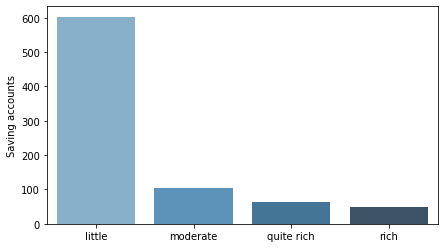

In [4]:
plt.figure(figsize=(7, 4))
sns.barplot(x = df['Saving accounts'].value_counts().index, 
            y = df['Saving accounts'].value_counts(),
            palette='Blues_d');

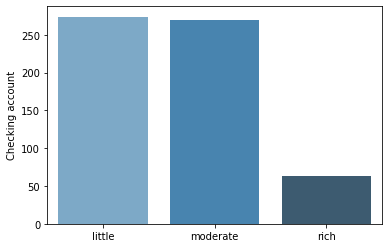

In [5]:
sns.barplot(x = df['Checking account'].value_counts().index, 
            y = df['Checking account'].value_counts(),
            palette='Blues_d');

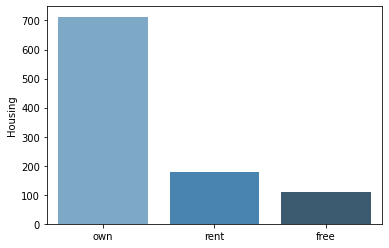

In [6]:
sns.barplot(x = df['Housing'].value_counts().index, 
            y = df['Housing'].value_counts(),
            palette='Blues_d');

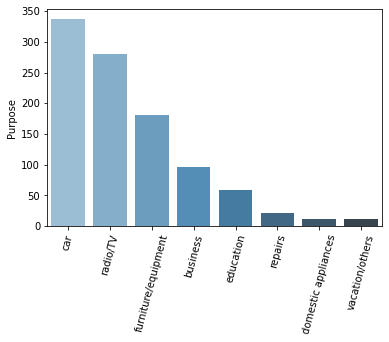

In [7]:
sns.barplot(x = df['Purpose'].value_counts().index, 
            y = df['Purpose'].value_counts(),
            palette='Blues_d');

plt.xticks(rotation=75);

## Fill Missing Values
For now, let's fill missing values with `mode`

In [8]:
df['Saving accounts'] = df['Saving accounts'].fillna('little')
df['Checking account'] = df['Checking account'].fillna('little')

In [9]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

## Encode Data
We apply `One-Hot Encoding` when:
1.   The categorical feature is `not ordinal` (like the countries above)
2.   The number of categorical features is less so one-hot encoding can be effectively applied

We apply `Label Encoding` when:
1. The categorical feature is `ordinal `(like Jr. kg, Sr. kg, Primary school, high school)
2. The number of categories is quite large as one-hot encoding can lead to high memory consumption



In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
print(f"List object columns: {list(df.select_dtypes(include=['object']).columns)}")

List object columns: ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


### Note
Here we have `ordinal` data which are `Sex`, `Saving accounts`, `Checking account`, `Risk`. <br> Also `non ordinal` which are  `Housing`, `Purpose`.

In [13]:
ordinal = ['Sex', 'Saving accounts', 'Checking account', 'Risk']
non_ordinal = ['Housing', 'Purpose']

In [14]:
df[ordinal] = df[ordinal].apply(lambda x: LabelEncoder().fit_transform(x.str.strip()))

In [15]:
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot_df = pd.DataFrame(one_hot.fit_transform(df[non_ordinal]).toarray())
df = df.join(one_hot_df)

df.drop(non_ordinal, axis=1, inplace=True)
df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,0,1,2,3,4,5,6,7,8,9,10
0,67,1,2,0,0,1169,6,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,0,2,0,1,5951,48,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,1,1,0,0,2096,12,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,1,2,0,0,7882,42,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,1,2,0,0,4870,24,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Sex               1000 non-null   int64  
 2   Job               1000 non-null   int64  
 3   Saving accounts   1000 non-null   int64  
 4   Checking account  1000 non-null   int64  
 5   Credit amount     1000 non-null   int64  
 6   Duration          1000 non-null   int64  
 7   Risk              1000 non-null   int64  
 8   0                 1000 non-null   float64
 9   1                 1000 non-null   float64
 10  2                 1000 non-null   float64
 11  3                 1000 non-null   float64
 12  4                 1000 non-null   float64
 13  5                 1000 non-null   float64
 14  6                 1000 non-null   float64
 15  7                 1000 non-null   float64
 16  8                 1000 non-null   float64
 

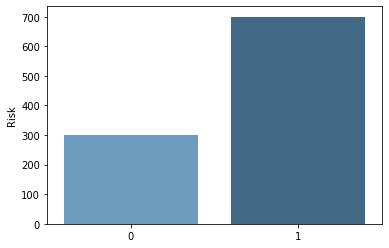

In [17]:
sns.barplot(x = df['Risk'].value_counts().index, 
            y = df['Risk'].value_counts(),
            palette='Blues_d');

## Sampling Method
Let's compare between undersampling and oversampling

In [18]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

undersample = RandomUnderSampler(sampling_strategy='majority')
oversample = SMOTE(sampling_strategy='minority')

In [19]:
X = df.drop(['Risk'], axis=1)
y = df.Risk

X_under, y_under = undersample.fit_resample(X, y)
X_over, y_over = oversample.fit_resample(X, y)

In [20]:
print(Counter(y_under))
print(Counter(y_over))

Counter({0: 300, 1: 300})
Counter({1: 700, 0: 700})


## Split Data & Build ML Model
Stratification in train_test_split means that the split method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### With undersampling data

In [22]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_under, 
                                                                                                    y_under, 
                                                                                                    test_size=0.2, 
                                                                                                    random_state=42, 
                                                                                                    stratify=y_under)

In [23]:
model = RandomForestClassifier()
model.fit(X_train_undersample, y_train_undersample)

y_pred_undersample = model.predict(X_test_undersample)

print(classification_report(y_test_undersample, y_pred_undersample))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61        60
           1       0.61      0.57      0.59        60

    accuracy                           0.60       120
   macro avg       0.60      0.60      0.60       120
weighted avg       0.60      0.60      0.60       120



### With oversampling data

In [24]:
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X_over, 
                                                                                                y_over, 
                                                                                                test_size=0.2, 
                                                                                                random_state=42, 
                                                                                                stratify=y_over)

In [25]:
model = RandomForestClassifier()
model.fit(X_train_oversample, y_train_oversample)

y_pred_oversample = model.predict(X_test_oversample)

print(classification_report(y_test_oversample, y_pred_oversample))

              precision    recall  f1-score   support

           0       0.82      0.74      0.77       140
           1       0.76      0.84      0.80       140

    accuracy                           0.79       280
   macro avg       0.79      0.79      0.79       280
weighted avg       0.79      0.79      0.79       280



## Learning Sources
Sythetic Minority Oversampling Technique <br>
https://www.youtube.com/watch?v=FheTDyCwRdE

German Credit Dataset<Br>
https://www.kaggle.com/datasets/uciml/german-credit

Random Oversampling and Undersampling for Imbalanced Classification <br>
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

One-Hot Encoding vs. Label Encoding using Scikit-Learn <br>
https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/